# Machine Learning 2 Exercise Set 4
# Ulzii-Utas

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
import scipy as sp
import statistics
from numba import jit, cuda
import time
sns.set_style('whitegrid')
%matplotlib inline

## 1-a,b

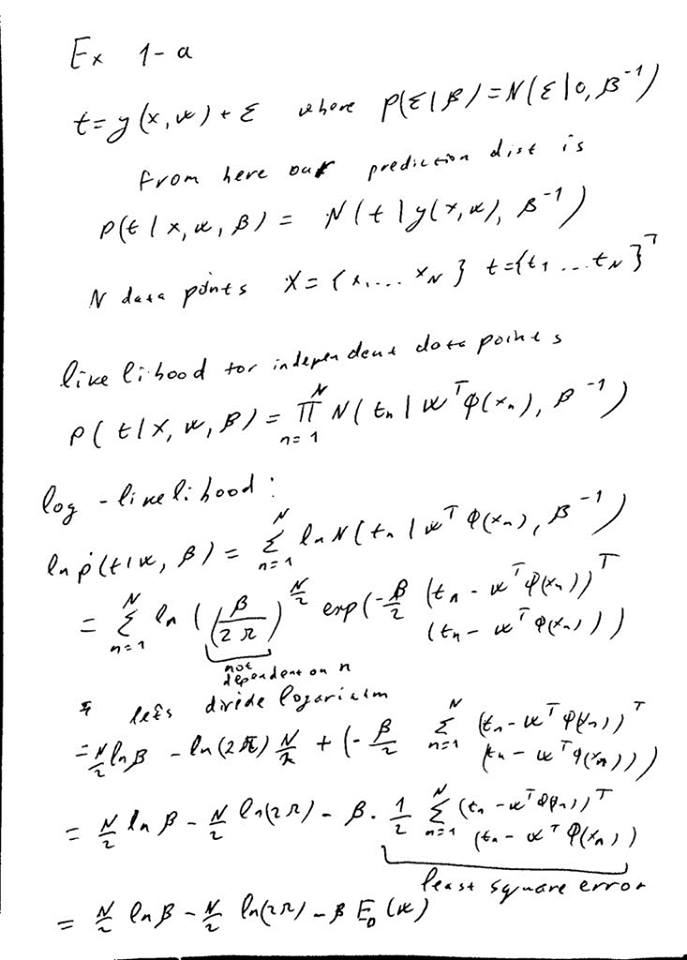

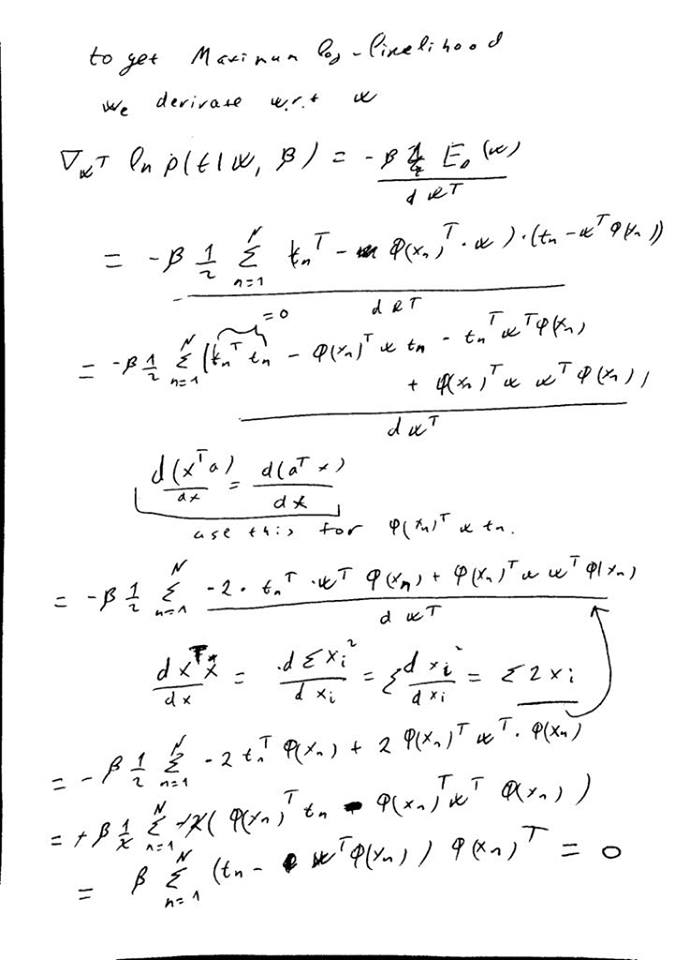

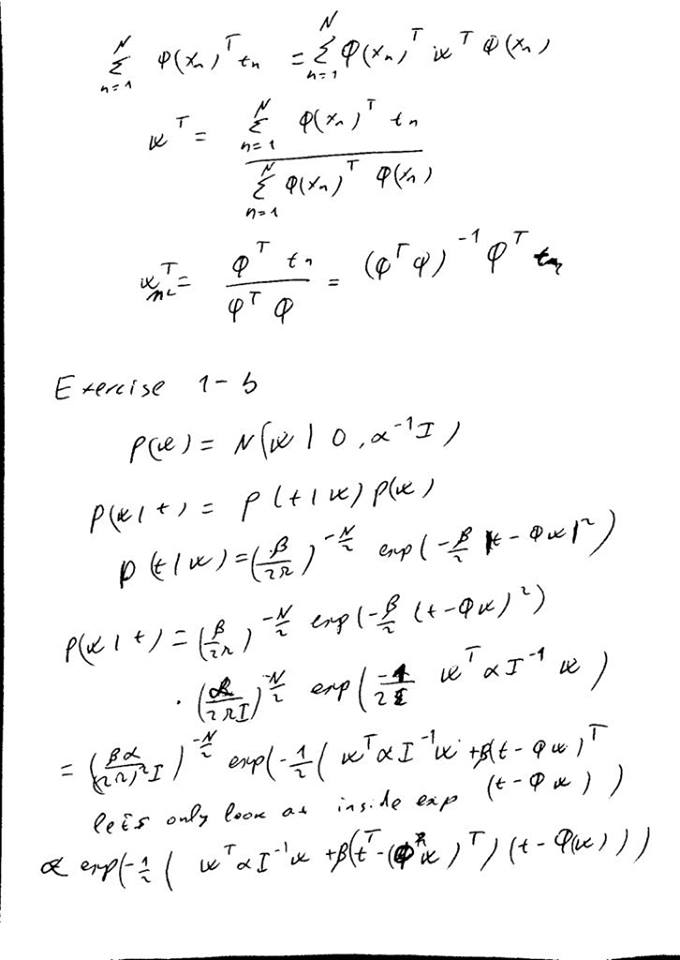

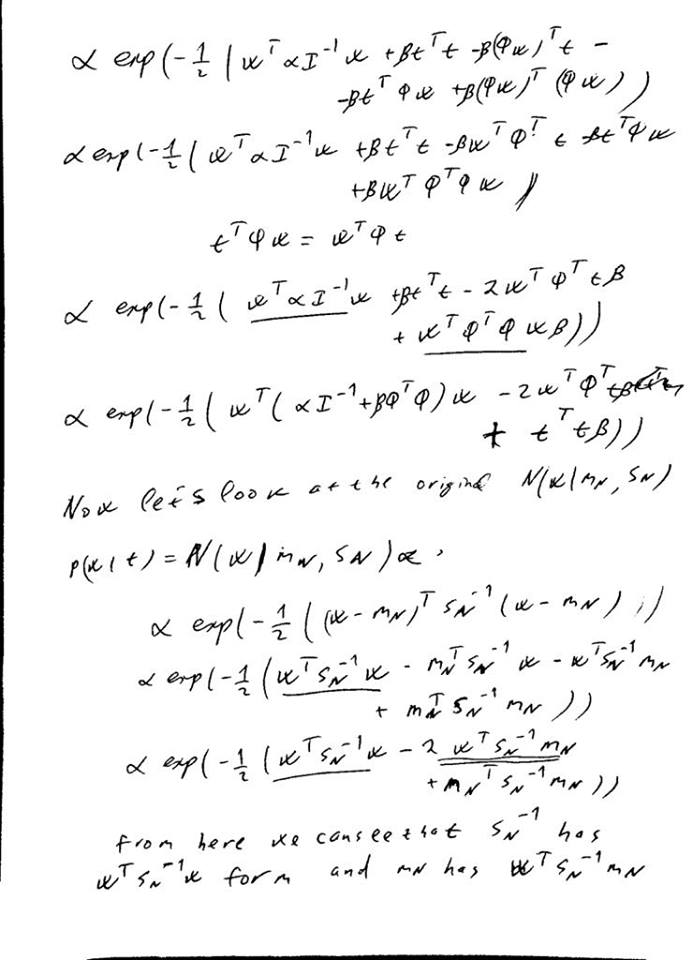

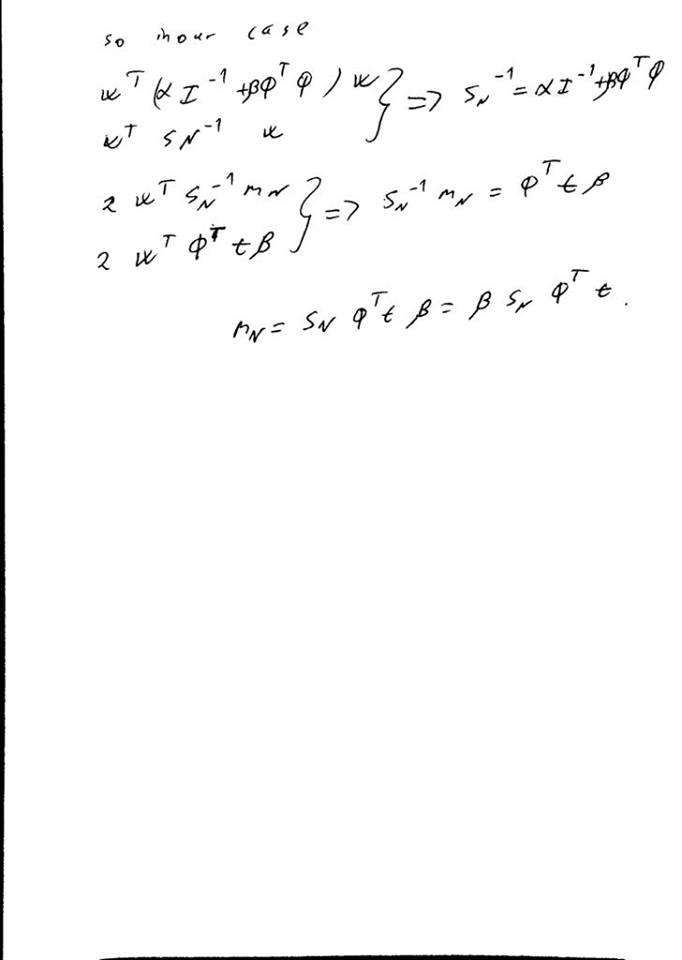

## 1-c

We use following equation to get ML:
        $w_{ml} = (\phi^T\phi)^{-1}\phi^Tt$

to predict we use the following: $y(x, w) = w^T\phi(x)$
        

In [2]:
testdatax = np.array(pd.read_fwf('.\Datafiles-Exer-4\Testdatax.txt').columns).astype(float);
testdatay = np.array(pd.read_fwf('.\Datafiles-Exer-4\Testdatay.txt').columns).astype(float);

traindatax = np.array(pd.read_fwf('.\Datafiles-Exer-4\Traindatax.txt').columns).astype(float);
traindatay = np.array(pd.read_fwf('.\Datafiles-Exer-4\Traindatay.txt').columns).astype(float);

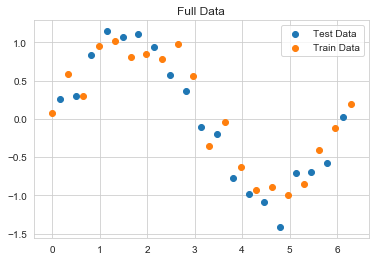

In [3]:
plt.scatter(testdatax, testdatay, label = 'Test Data');
plt.scatter(traindatax, traindatay, label = 'Train Data');
plt.title('Full Data');
plt.legend();

In [23]:
sigma_phi = np.array([1, 10, .1]);
alpha = np.array([1, 1*10**-8]);

N = 20;
M = 9;
beta = 50;

In [24]:
def phi_func(x, x_n, sigma_phi, m, M):   
    
    mu = np.linspace(0,6.5, M);
    
#     return np.exp((-(np.abs(x-mu[m]))**2)/(2*(sigma_phi**2)));
    return np.exp((-(np.abs(x-x_n))**2)/(2*(sigma_phi**2)));

In [25]:
def basis_function_vector(data, sigma_phi, N, M):
    N = len(data);
    gramian_matrix = np.zeros([N, M]);
    for i in range(N):
        for j in range(M):
            if j == 0:            
                gramian_matrix[i][j] = 1;
            else:            
                gramian_matrix[i][j] = phi_func(data[i], data[j], sigma_phi, j, M);
    return gramian_matrix;

In [32]:
def maximum_likelihood_func(gramian_matrix, data, sigma_phi, M): 
    
    maximum_likelihood = np.zeros([len(sigma_phi), M]);
    
    lambda_ = 1;
    
    for l in range(len(sigma_phi)):
        maximum_likelihood[l] = np.matmul(np.matmul(np.linalg.inv(lambda_ * np.identity(M) + np.matmul(np.matrix.transpose(gramian_matrix[l]), gramian_matrix[l])), np.matrix.transpose(gramian_matrix[l])), data)
    return maximum_likelihood;

In [33]:
def regression(maximum_likelihood, data, sigma_phi, M):
    return np.matmul(np.matrix.transpose(maximum_likelihood), np.matrix.transpose(basis_function_vector(data, sigma_phi, len(data), M)));

## Lets check different M for train dataset

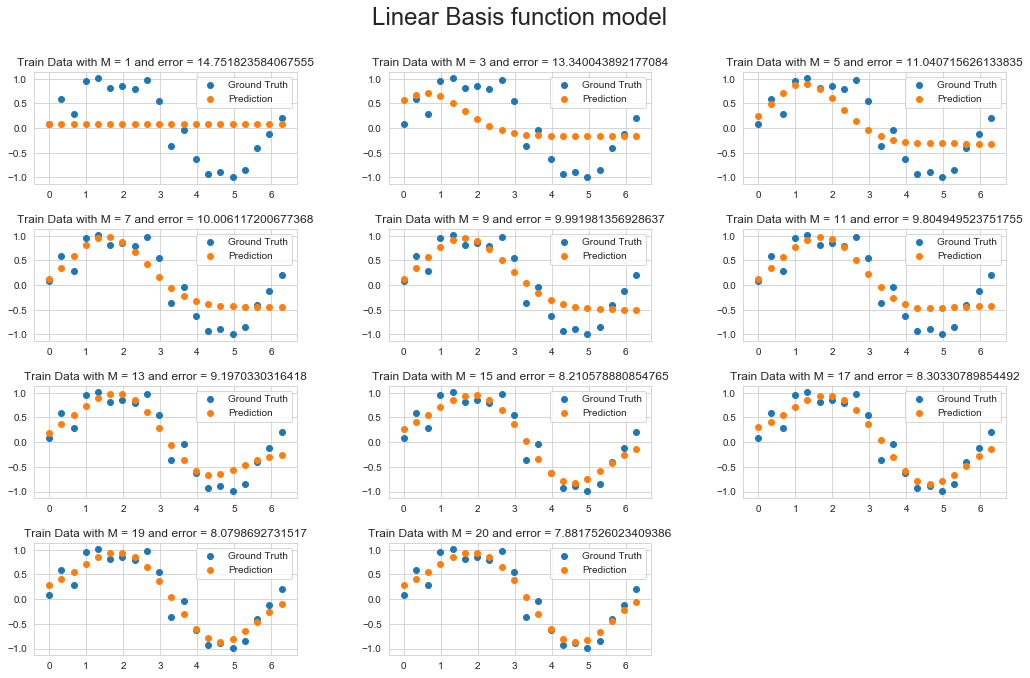

In [34]:
M_arr = np.array([1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 20]);

plt.figure(figsize=(15, 10));
plt.suptitle('Linear Basis function model', fontsize=24);

for k in range(len(M_arr)):
    
    gramian_matrix = np.zeros([len(sigma_phi), N, M_arr[k]]);
    
    for l in range(len(sigma_phi)):
        gramian_matrix[l] = basis_function_vector(traindatax, sigma_phi[l], len(traindatax), M_arr[k]);

    maximum_likelihood = np.zeros([len(sigma_phi), M_arr[k]]);
    maximum_likelihood = maximum_likelihood_func(gramian_matrix, traindatay, sigma_phi, M_arr[k]);
    
    regression_y_train = np.zeros([len(sigma_phi), len(traindatay)]);    

    for l in range(len(sigma_phi)):
        regression_y_train[l] = regression(maximum_likelihood[l], traindatax, sigma_phi[l], M_arr[k]);
    
    error_train = np.sum(np.sqrt(np.abs(traindatay-regression_y_train[0])));  
    
    plt.subplot(4,3,k+1)
    plt.scatter(traindatax, traindatay, label = 'Ground Truth');
    plt.scatter(traindatax, regression_y_train[0], label = 'Prediction');
    plt.title('Train Data with M = {} and error = {}'.format(M_arr[k], error_train));
    plt.legend();
    
plt.subplots_adjust(top=0.89, bottom=0.08, left=0.05, right=0.95, hspace=0.40, wspace=0.35)
plt.show()

From above plots, we can see that M = 9 gives us the best fit. Less than 9 it is underfitting and more than 9 is giving us overfitting.

In [35]:
M = 19;
gramian_matrix = np.zeros([len(sigma_phi), N, M]);
for l in range(len(sigma_phi)):
    gramian_matrix[l] = basis_function_vector(traindatax, sigma_phi[l], len(traindatax), M);
    
maximum_likelihood = np.zeros([len(sigma_phi), M]);
maximum_likelihood = maximum_likelihood_func(gramian_matrix, traindatay, sigma_phi, M);

In [36]:
regression_y_train = np.zeros([len(sigma_phi), len(traindatay)]);
regression_y_test = np.zeros([len(sigma_phi), len(testdatay)]);

for l in range(len(sigma_phi)):
    regression_y_train[l] = regression(maximum_likelihood[l], traindatax, sigma_phi[l], M);
    regression_y_test[l] = regression(maximum_likelihood[l], testdatay, sigma_phi[l], M);

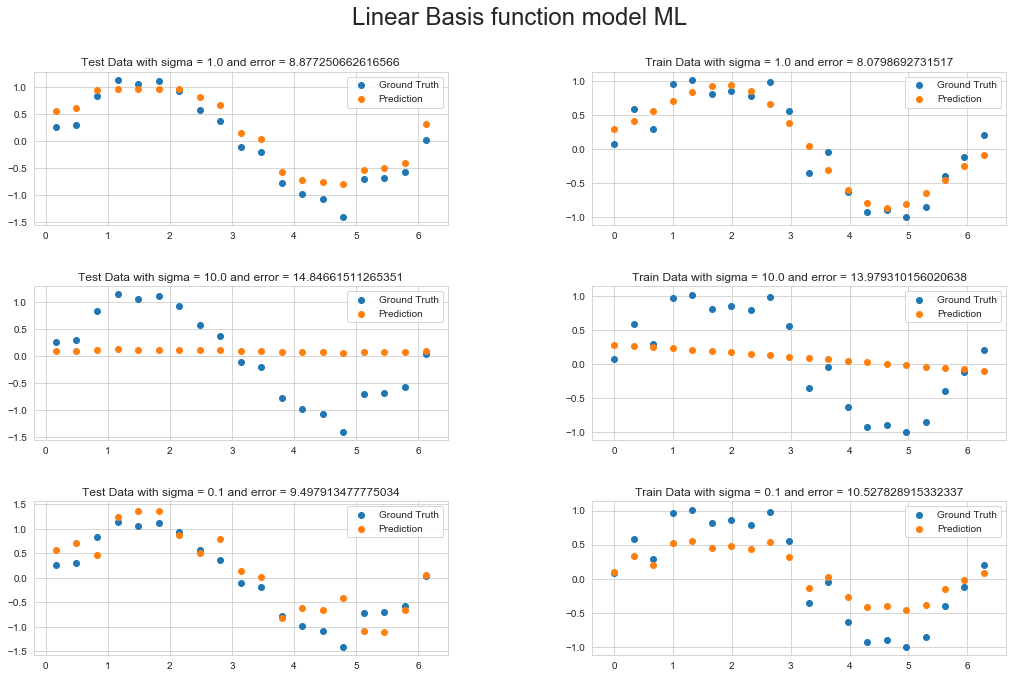

In [37]:
   
plt.figure(figsize=(15, 10));
plt.suptitle('Linear Basis function model ML', fontsize=24);

for l in range(len(sigma_phi)):
    
    error_test = np.sum(np.sqrt(np.abs(testdatay-regression_y_test[l])));
    error_train = np.sum(np.sqrt(np.abs(traindatay-regression_y_train[l])));    

    plt.subplot(len(sigma_phi),2,2*l+1)
    plt.scatter(testdatax, testdatay, label = 'Ground Truth');
    plt.scatter(testdatax, regression_y_test[l], label = 'Prediction');    
    plt.title('Test Data with sigma = {} and error = {}'.format(sigma_phi[l], error_test));
    plt.legend();

    plt.subplot(len(sigma_phi),2,2*l+2)
    plt.scatter(traindatax, traindatay, label = 'Ground Truth');
    plt.scatter(traindatax, regression_y_train[l], label = 'Prediction');    
    plt.title('Train Data with sigma = {} and error = {}'.format(sigma_phi[l], error_train));
    plt.legend();
    
plt.subplots_adjust(top=0.89, bottom=0.08, left=0.05, right=0.95, hspace=0.40, wspace=0.35)
plt.show()

With $\sigma = 1$ we have best fitting, but when it was lower or higher we can see either overfitting or underfitting.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: RuntimeWarning: covariance is not symmetric positive-semidefinite.


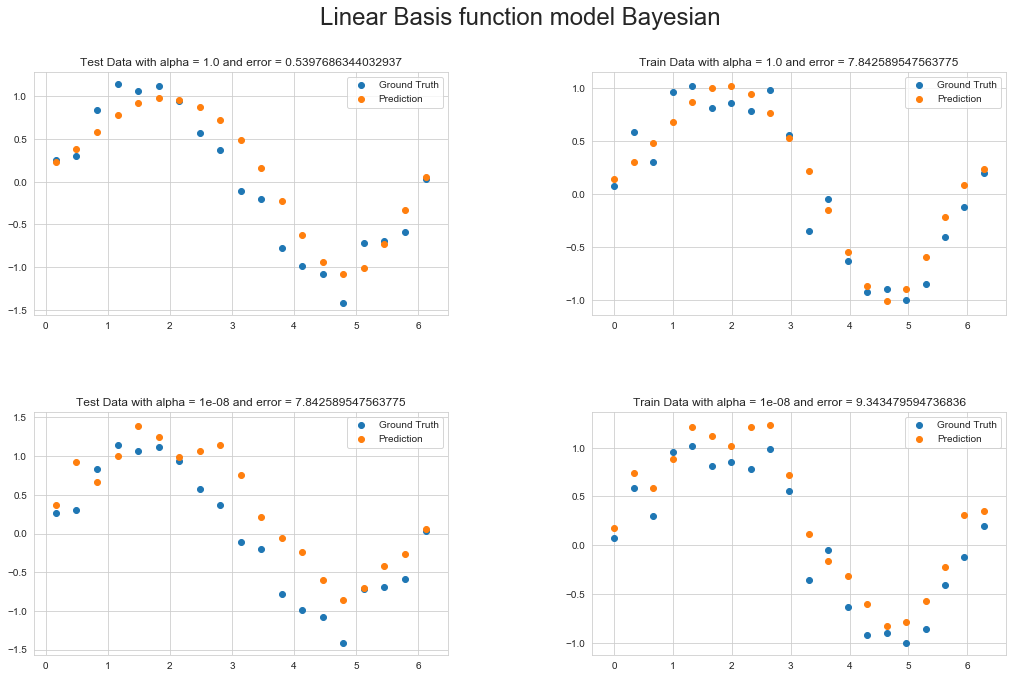

In [22]:
bayesian_posterior = np.array([len(alpha), M]);

# gramian matrix for train set
gramian_matrix_for_bayesian_train = np.zeros([N, M]);
gramian_matrix_for_bayesian_train = basis_function_vector(traindatax, sigma_phi[0], len(traindatax), M);

# gramian matrix for test set
gramian_matrix_for_bayesian_test = np.zeros([N, M]);
gramian_matrix_for_bayesian_test = basis_function_vector(testdatax, sigma_phi[0], len(testdatax), M); 
    
plt.figure(figsize=(15, 10));
plt.suptitle('Linear Basis function model Bayesian', fontsize=24);

for l in range(len(alpha)):
    # first we find the mean_n and S_N for the posterior distribution
    S_N_inv = alpha[l] * np.identity(M) + beta*np.matmul(np.matrix.transpose(gramian_matrix_for_bayesian_train),gramian_matrix_for_bayesian_train);
    S_N = np.linalg.inv(S_N_inv);    
    mean_N = np.matmul(np.matmul(beta * S_N, np.matrix.transpose(gramian_matrix_for_bayesian_train)), traindatay);
        
    # using the mean_n and S_N from the posterior distrubtion, we get predictive distribution 
    # for t using the gramian matrix for test set to predict test data set
    sigma_N = 1/beta + np.matmul(np.matmul(gramian_matrix_for_bayesian_test, S_N), np.matrix.transpose(gramian_matrix_for_bayesian_test));
    mean_predictive = np.matmul(mean_N, np.matrix.transpose(gramian_matrix_for_bayesian_test));
    predictive_dist_test = np.random.multivariate_normal(mean_predictive, sigma_N);    
    
    error_test = np.sum(np.sqrt(np.abs(testdatay-predictive_dist_test)));
    
    plt.subplot(2,2,2*l+1)
    plt.scatter(testdatax, testdatay, label = 'Ground Truth');
    plt.scatter(testdatax, predictive_dist_test, label = 'Prediction');    
    plt.title('Test Data with alpha = {} and error = {}'.format(alpha[l], error_train));
    plt.legend();
    
    # using the mean_n and S_N from the posterior distrubtion, we get predictive distribution 
    # for t using the gramian matrix for train set to predict train data set
    sigma_N = 1/beta + np.matmul(np.matmul(gramian_matrix_for_bayesian_train, S_N), np.matrix.transpose(gramian_matrix_for_bayesian_train));
    mean_predictive = np.matmul(mean_N, np.matrix.transpose(gramian_matrix_for_bayesian_train));
    predictive_dist_train = np.random.multivariate_normal(mean_predictive, sigma_N);    
    
    error_train = np.sum(np.sqrt(np.abs(traindatay-predictive_dist_train)));   
    
    plt.subplot(2,2,2*l+2)
    plt.scatter(traindatax, traindatay, label = 'Ground Truth');
    plt.scatter(traindatax, predictive_dist_train, label = 'Prediction');    
    plt.title('Train Data with alpha = {} and error = {}'.format(alpha[l], error_train));
    plt.legend();      
    
plt.subplots_adjust(top=0.89, bottom=0.08, left=0.05, right=0.95, hspace=0.40, wspace=0.35)
plt.show()
    

With $\alpha = 10^{-8}$ we have the lowest error.

In Bayesian model, our error in Train data set is almost similar because with enough data set our prediction gets really close to the real data set without really considering alpha as mentioned in lecture.
However, ML solution doesn't give us this advantage with infinite data set so that we need to tune our sigma and M according to the data set. 

## 2-a,b,c,d

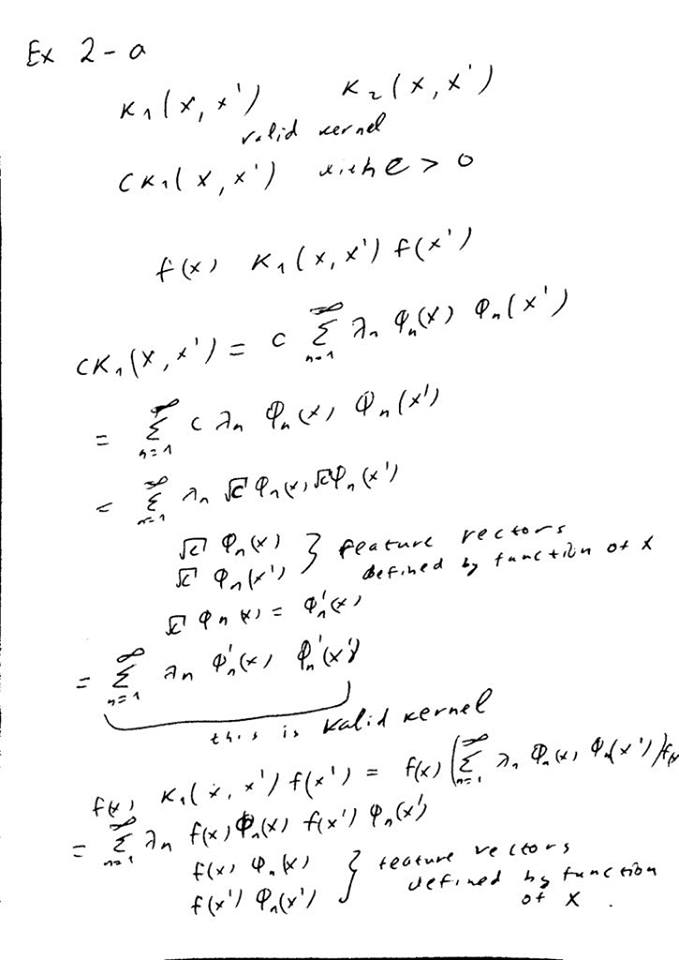

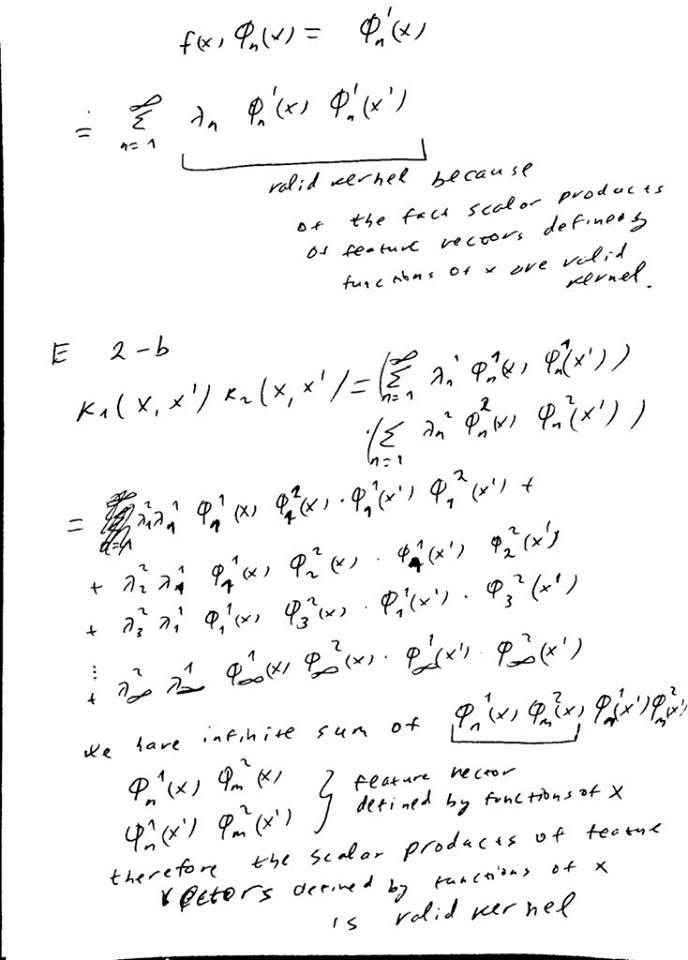

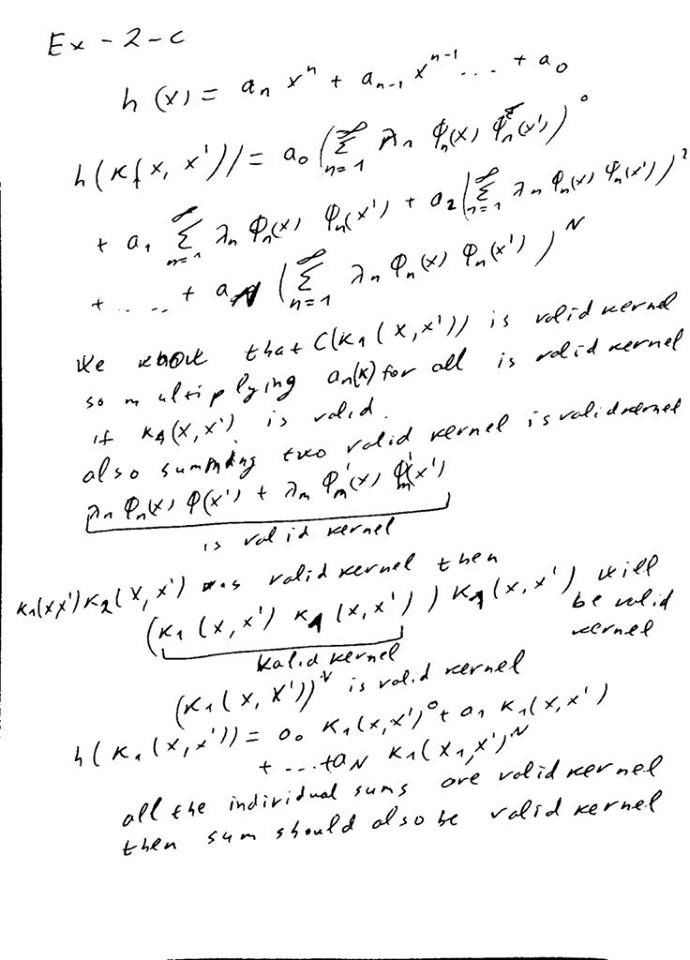

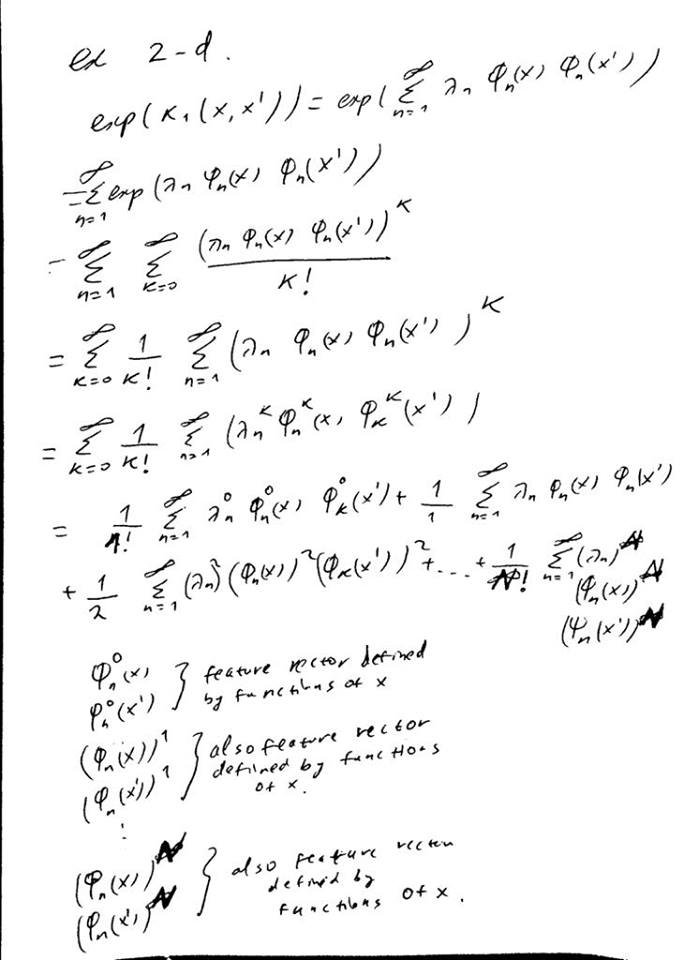

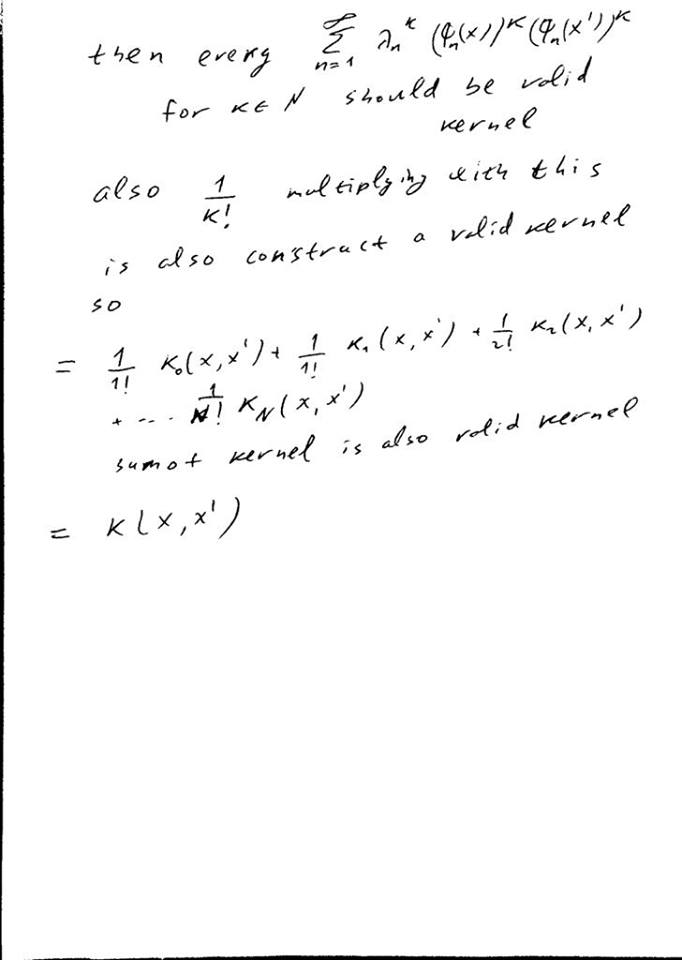

## 3

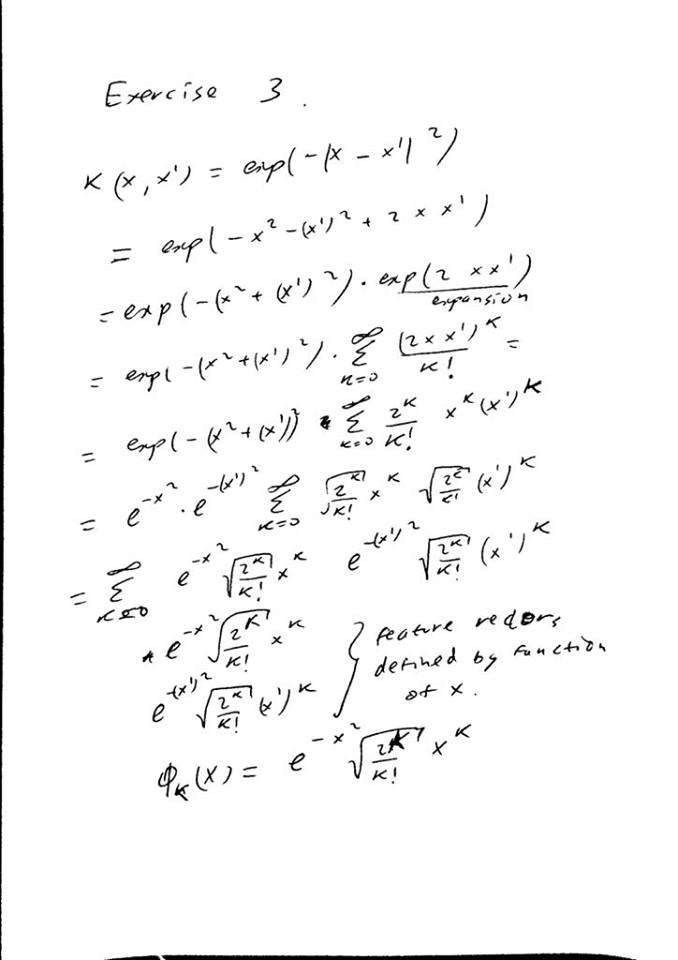